Saved combined data for U-Net_BiPyramid to U-Net_BiPyramid_combined_log.csv
Generated plot: U-Net_BiPyramid_metrics.png
Saved combined data for U-Net_BiPyramid_SE to U-Net_BiPyramid_SE_combined_log.csv
Generated plot: U-Net_BiPyramid_SE_metrics.png
Saved combined data for U-Net_BiPyramid_DI1212 to U-Net_BiPyramid_DI1212_combined_log.csv
Generated plot: U-Net_BiPyramid_DI1212_metrics.png


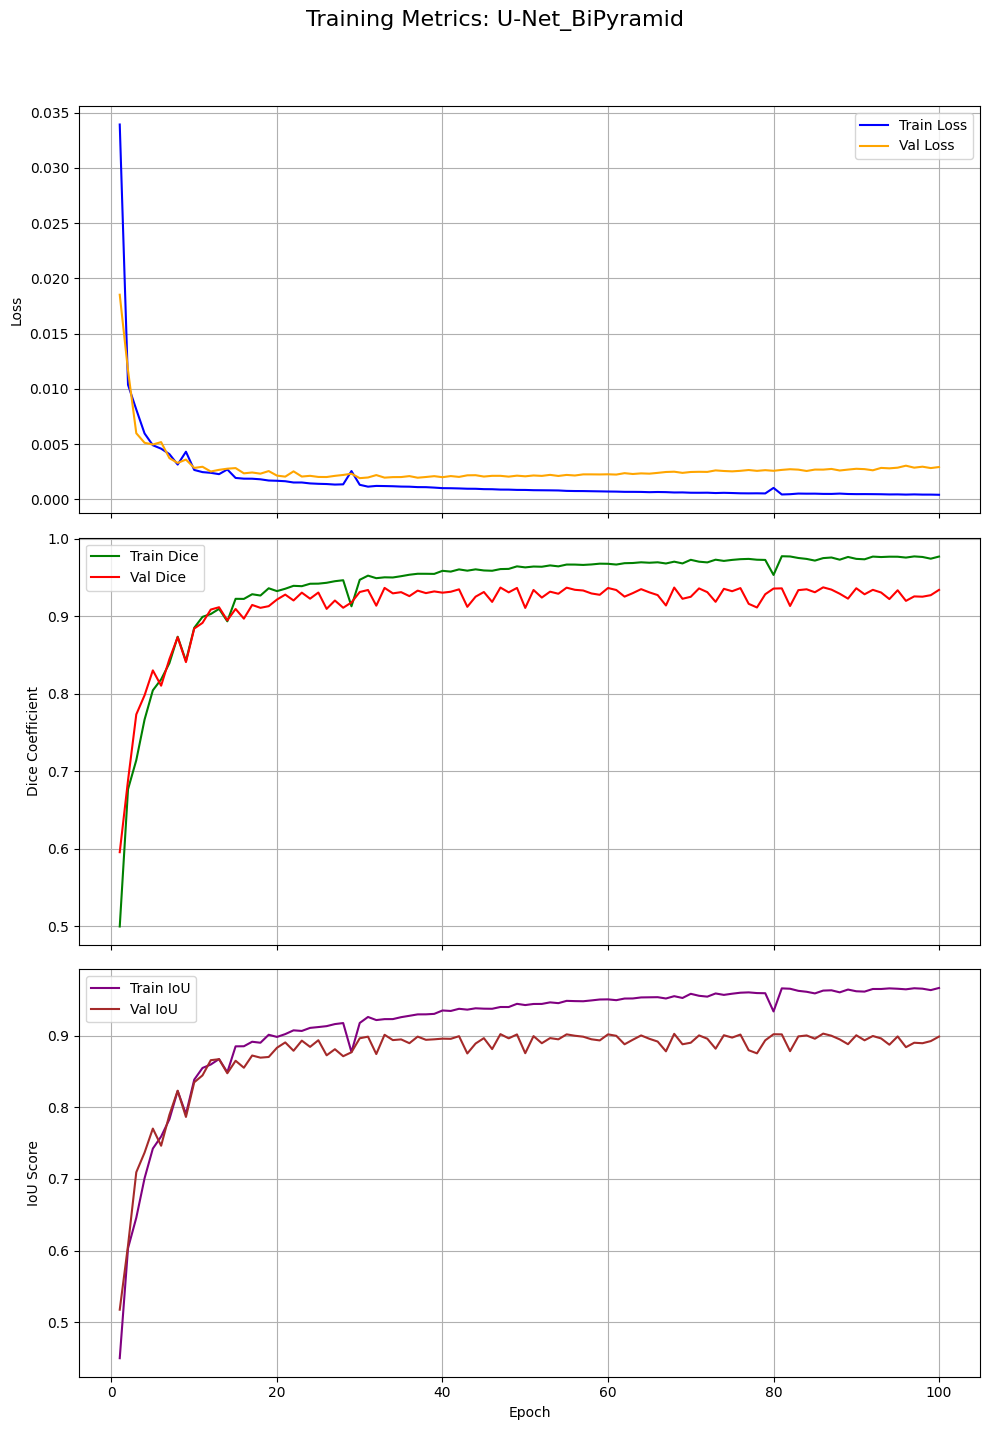

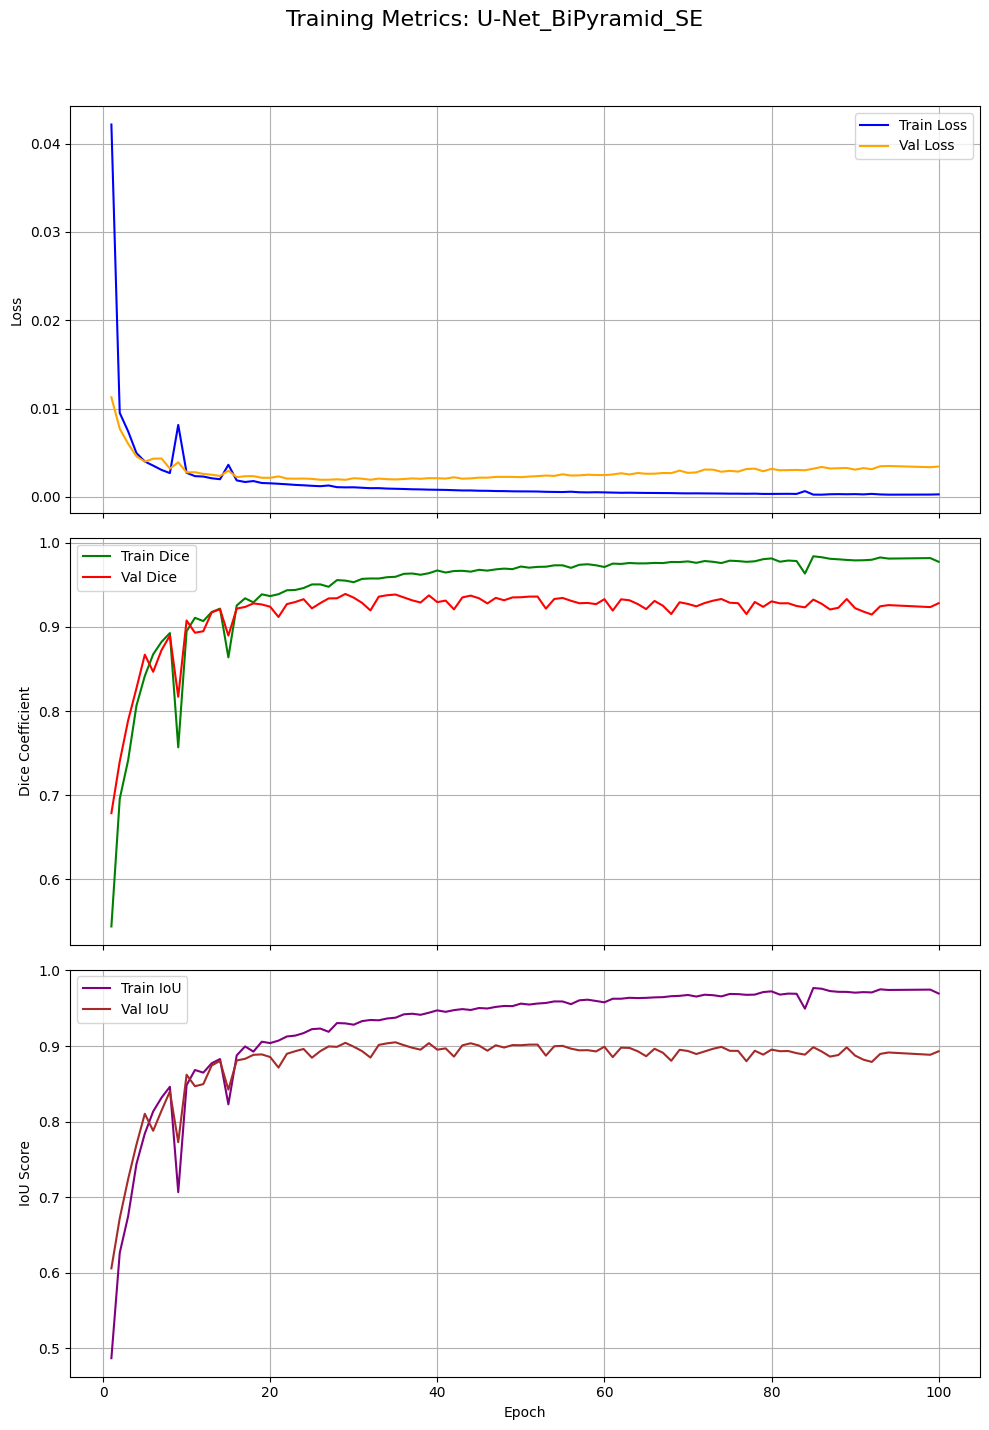

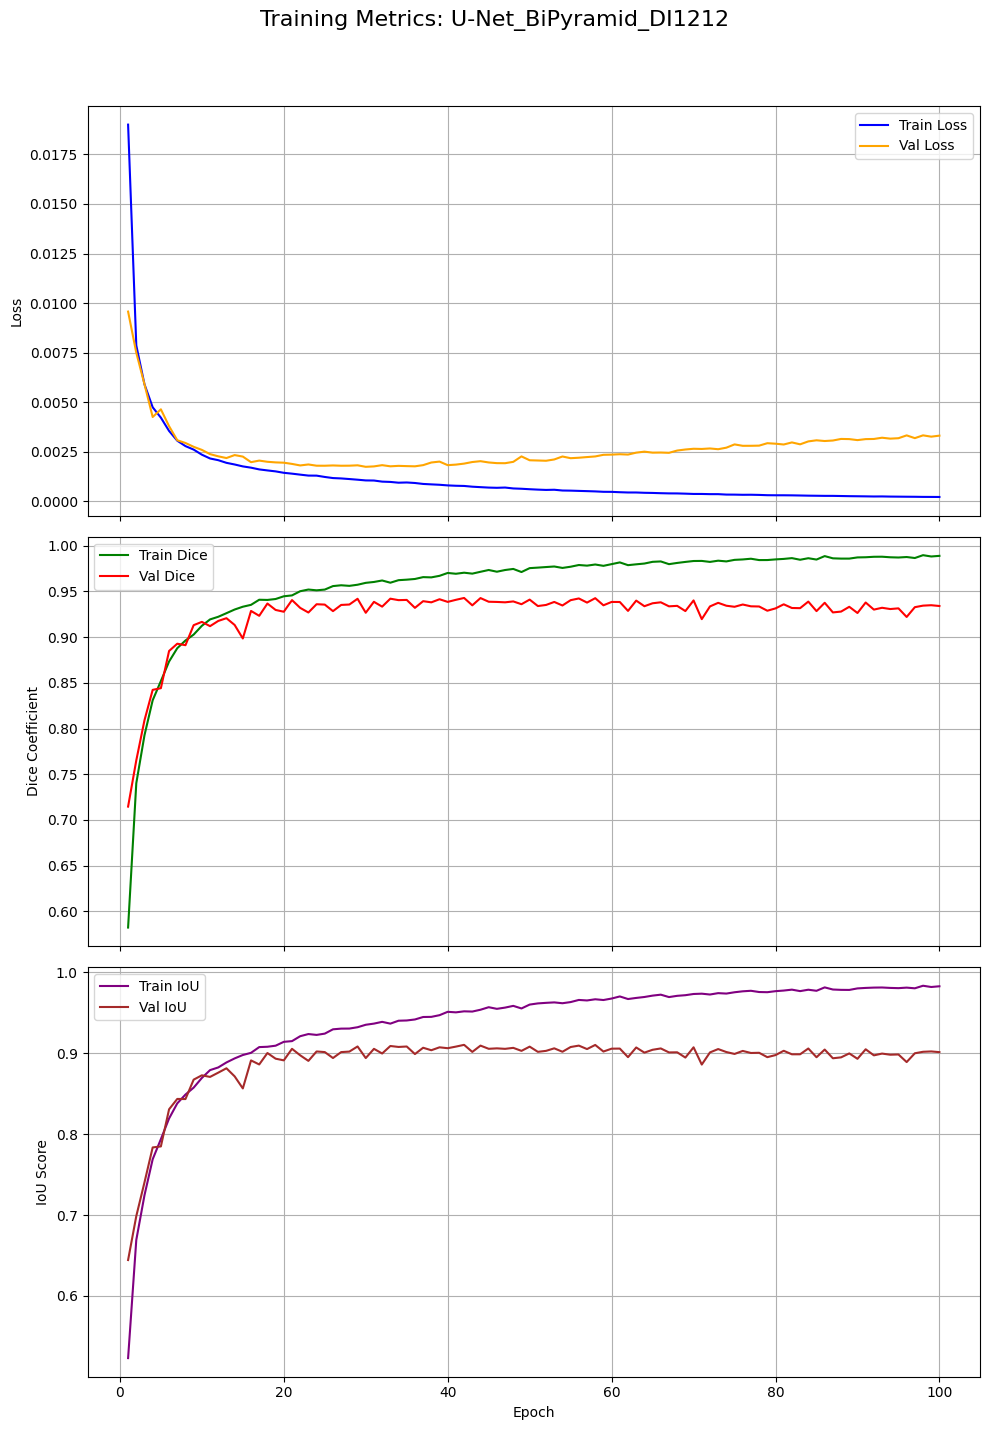

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

# Define the directory where logs are stored
log_dir = 'training_log/big_account/'

def extract_info(filename):
    """Extracts model name and timestamp from the filename."""
    # Pattern: ModelName_DD-MM-YYYY_HH-MM-SS.csv
    match = re.search(r'^(.*?)_(\d{2}-\d{2}-\d{4}_\d{2}-\d{2}-\d{2})\.csv$', filename)
    if match:
        model_name = match.group(1)
        timestamp_str = match.group(2)
        timestamp = datetime.strptime(timestamp_str, '%d-%m-%Y_%H-%M-%S')
        return model_name, timestamp
    return None, None

def process_and_plot():
    # 1. List and Group Files
    if not os.path.exists(log_dir):
        print(f"Directory {log_dir} not found.")
        return

    all_files = [f for f in os.listdir(log_dir) if f.endswith('.csv')]
    groups = {}

    for f in all_files:
        mname, tstamp = extract_info(f)
        if mname:
            if mname not in groups:
                groups[mname] = []
            groups[mname].append((tstamp, os.path.join(log_dir, f)))

    # 2. Process Each Model
    for model_name, files_with_time in groups.items():
        # Sort by timestamp to ensure epochs are in order
        files_with_time.sort()
        
        # Join dataframes
        df_list = []
        for _, filepath in files_with_time:
            df_list.append(pd.read_csv(filepath))
        
        combined_df = pd.concat(df_list, ignore_index=True)
        
        # Save the combined result to CSV
        path_to_save_log = os.path.join(log_dir, 'combine_logs')
        os.makedirs(path_to_save_log, exist_ok=True)
        combined_filename = f"{model_name}_combined_log.csv"
        combined_df.to_csv(os.path.join(path_to_save_log, combined_filename), index=False)
        print(f"Saved combined data for {model_name} to {combined_filename}")

        # 3. Plotting
        fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
        fig.suptitle(f'Training Metrics: {model_name}', fontsize=16)

        # Graph 1: Loss
        axes[0].plot(combined_df['epoch'], combined_df['train_loss'], label='Train Loss', color='blue')
        axes[0].plot(combined_df['epoch'], combined_df['val_loss'], label='Val Loss', color='orange')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)

        # Graph 2: Dice
        axes[1].plot(combined_df['epoch'], combined_df['train_dice'], label='Train Dice', color='green')
        axes[1].plot(combined_df['epoch'], combined_df['val_dice'], label='Val Dice', color='red')
        axes[1].set_ylabel('Dice Coefficient')
        axes[1].legend()
        axes[1].grid(True)

        # Graph 3: IoU
        axes[2].plot(combined_df['epoch'], combined_df['train_iou'], label='Train IoU', color='purple')
        axes[2].plot(combined_df['epoch'], combined_df['val_iou'], label='Val IoU', color='brown')
        axes[2].set_ylabel('IoU Score')
        axes[2].set_xlabel('Epoch')
        axes[2].legend()
        axes[2].grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig(os.path.join(path_to_save_log, f"{model_name}_metrics.png"))
        print(f"Generated plot: {model_name}_metrics.png")

if __name__ == "__main__":
    process_and_plot()